In [2]:
import csv
import re
import os

pattern = re.compile(
    r"\s*(?P<step>\d+)\s*/\s*(?P<total_steps>\d+)\s*:\s*episode:\s*(?P<episode>\d+)\s*,\s*duration:\s*(?P<duration>[\d.]+)s\s*,\s*episode steps:\s*(?P<episode_steps>\d+)\s*,\s*"
    r"steps per second:\s*(?P<steps_per_second>\d+)\s*,\s*episode reward:\s*(?P<episode_reward>[\d.]+)\s*,\s*mean reward:\s*(?P<mean_reward>[\d.]+)\s*\[.*?\]\s*,\s*"
    r"mean action:\s*(?P<mean_action>[\d.]+)\s*\[.*?\]\s*,\s*loss:\s*(?P<loss>[\d.]+)\s*,\s*mae:\s*(?P<mae>[\d.]+)\s*,\s*mean_q:\s*(?P<mean_q>[\d.]+)\s*,\s*"
    r"mean_eps:\s*(?P<mean_eps>[\d.]+)"
)

fields = [
    'step', 'total_steps', 'episode', 'duration', 'episode_steps',
    'steps_per_second', 'episode_reward', 'mean_reward', 'mean_action',
    'loss', 'mae', 'mean_q', 'mean_eps'
]

ruta = "dqn_version_6_train_data.txt"
ruta_salida = "dqn_version_6_train_data.csv"

with open(ruta, "r") as infile, open(ruta_salida, "w", newline='') as outfile:
    writer = csv.DictWriter(outfile, fieldnames=fields)
    writer.writeheader()
    
    for i, line in enumerate(infile):
        match = pattern.search(line)
        if match:
            writer.writerow(match.groupdict())

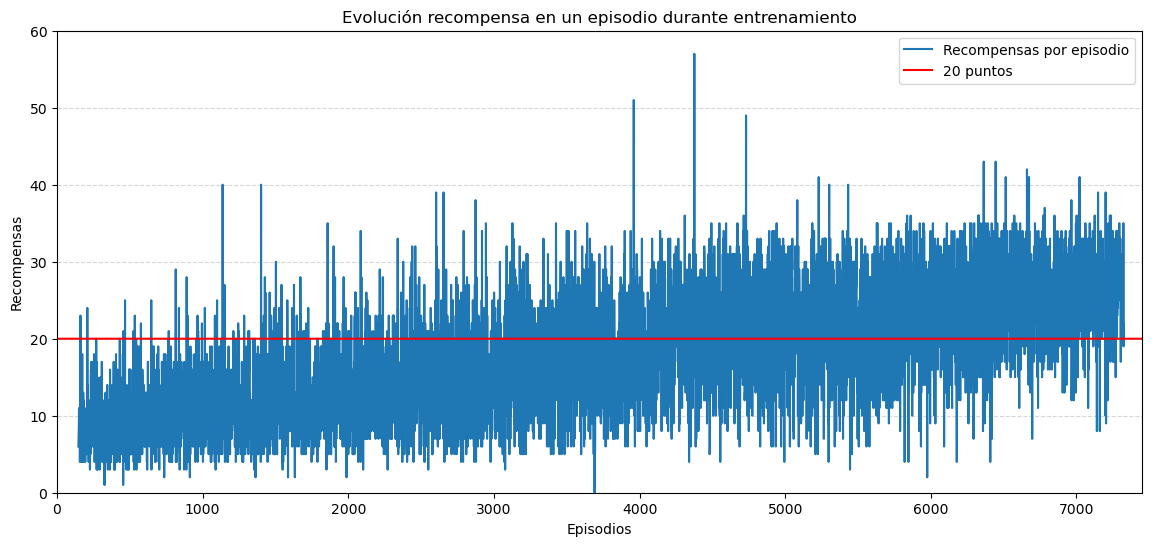

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datos_entrenamiento = pd.read_csv(ruta_salida)

plt.figure(figsize=(14,6))
plt.plot(datos_entrenamiento["episode"], datos_entrenamiento["episode_reward"], "-", label = "Recompensas por episodio")

x_min = [x for x in range(0, 7451)]
y_min = [20] * 7451
plt.plot(x_min, y_min, "r", label = "20 puntos")


plt.title("Evolución recompensa en un episodio durante entrenamiento")
plt.xlabel('Episodios')
plt.ylabel('Recompensas')
plt.xlim([0,7450])
plt.ylim([0,60])
plt.legend()
plt.grid(axis="y", linestyle = '--', alpha = 0.5)
plt.show()


step                7178
total_steps         7178
episode             7178
duration            7178
episode_steps       7178
steps_per_second    7178
episode_reward      7178
mean_reward         7178
mean_action         7178
loss                7178
mae                 7178
mean_q              7178
mean_eps            7178
dtype: int64


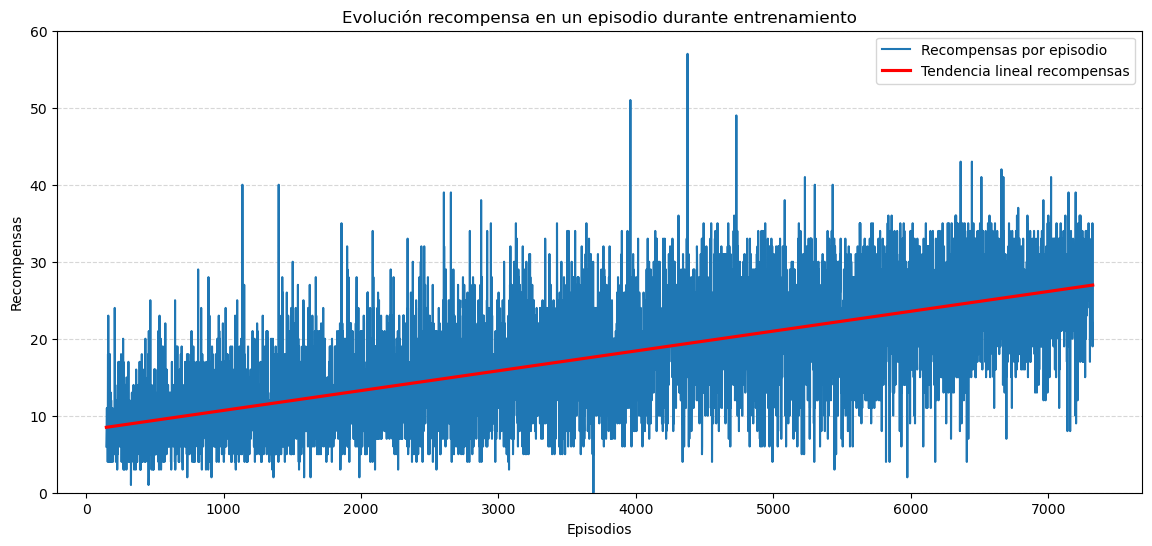

In [101]:
datos_entrenamiento = pd.read_csv(ruta_salida)
print(datos_entrenamiento.count())

plt.figure(figsize=(14,6))


nuevo_df = pd.DataFrame({
    "episode": datos_entrenamiento["episode"],
    "episode_reward": datos_entrenamiento["episode_reward"]
})
sns.lineplot(x = "episode", y = "episode_reward", data = nuevo_df, label = "Recompensas por episodio")
sns.regplot(x="episode", y="episode_reward", data=nuevo_df, scatter=False, label="Tendencia lineal recompensas", color="red")



plt.title("Evolución recompensa en un episodio durante entrenamiento")
plt.xlabel('Episodios')
plt.ylabel('Recompensas')
plt.ylim([0,60])
plt.legend()
plt.grid(axis="y", linestyle = '--', alpha = 0.5)
plt.show()


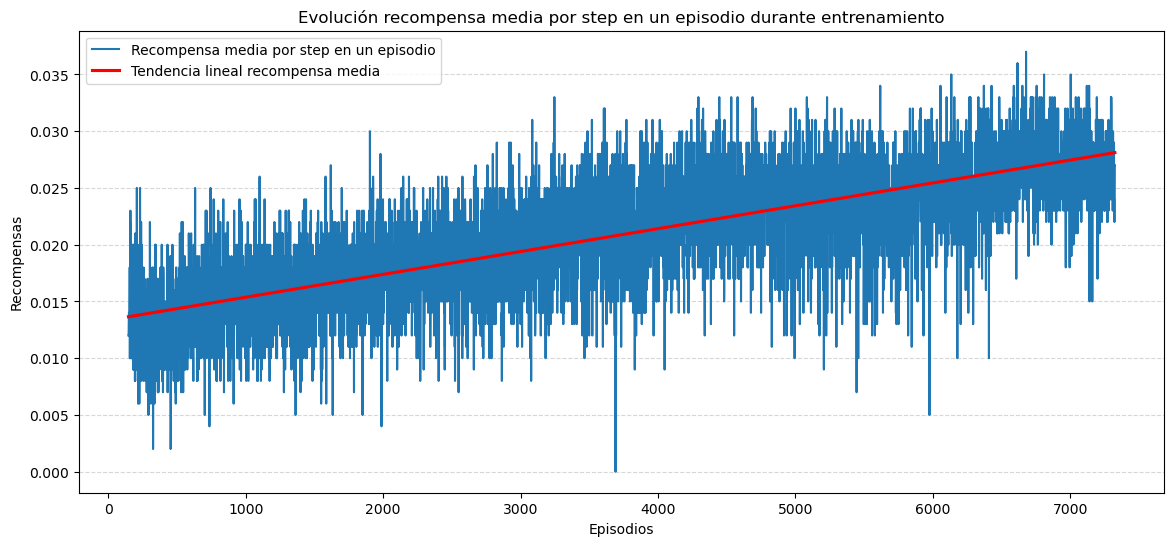

In [102]:
plt.figure(figsize=(14,6))

nuevo_df = pd.DataFrame({
    "episode": datos_entrenamiento["episode"],
    "mean_reward": datos_entrenamiento["mean_reward"]
})
sns.lineplot(x = "episode", y = "mean_reward", data = nuevo_df, label = "Recompensa media por step en un episodio")
sns.regplot(x="episode", y="mean_reward", data=nuevo_df, scatter=False, label="Tendencia lineal recompensa media", color="red")


plt.title("Evolución recompensa media por step en un episodio durante entrenamiento")
plt.xlabel('Episodios')
plt.ylabel('Recompensas')
#plt.ylim([0,60])
plt.legend()
plt.grid(axis="y", linestyle = '--', alpha = 0.5)
plt.show()

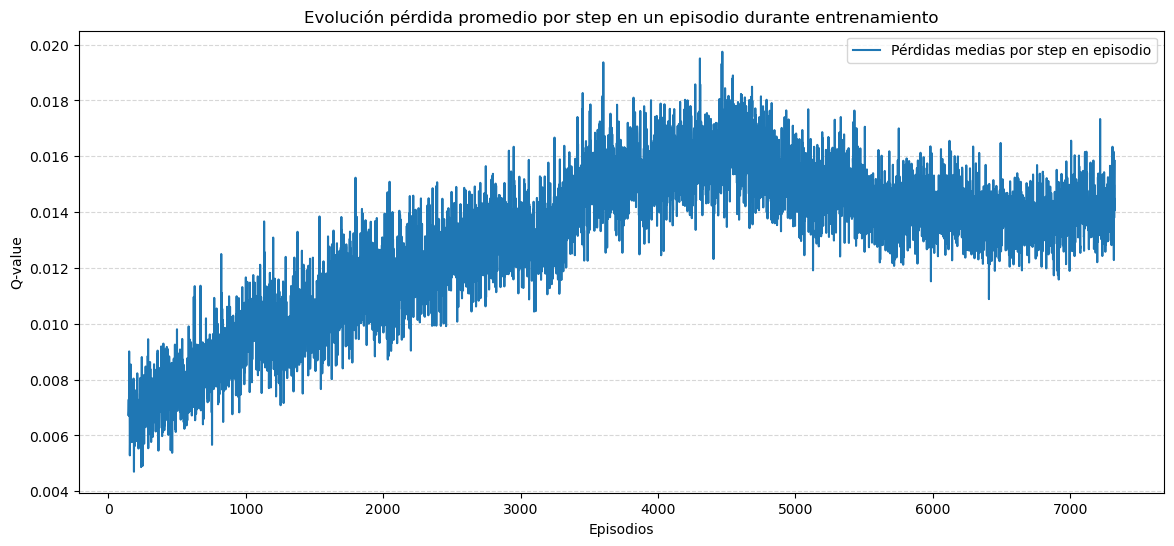

In [103]:
plt.figure(figsize=(14,6))
plt.plot(datos_entrenamiento["episode"], datos_entrenamiento["loss"], "-", label = "Pérdidas medias por step en episodio")


plt.title("Evolución pérdida promedio por step en un episodio durante entrenamiento")
plt.xlabel('Episodios')
plt.ylabel('Q-value')
plt.legend()
plt.grid(axis="y", linestyle = '--', alpha = 0.5)
plt.show()


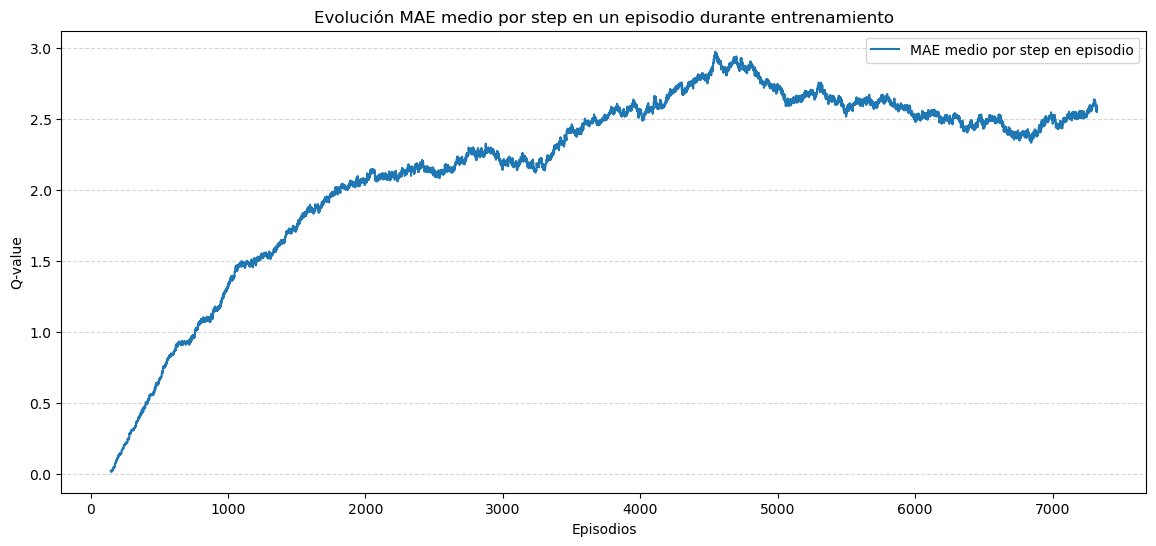

In [104]:
plt.figure(figsize=(14,6))
plt.plot( datos_entrenamiento["episode"], datos_entrenamiento["mae"], "-", label = "MAE medio por step en episodio")

plt.title("Evolución MAE medio por step en un episodio durante entrenamiento")
plt.xlabel('Episodios')
plt.ylabel('Q-value')
plt.legend()
plt.grid(axis="y", linestyle = '--', alpha = 0.5)
plt.show()

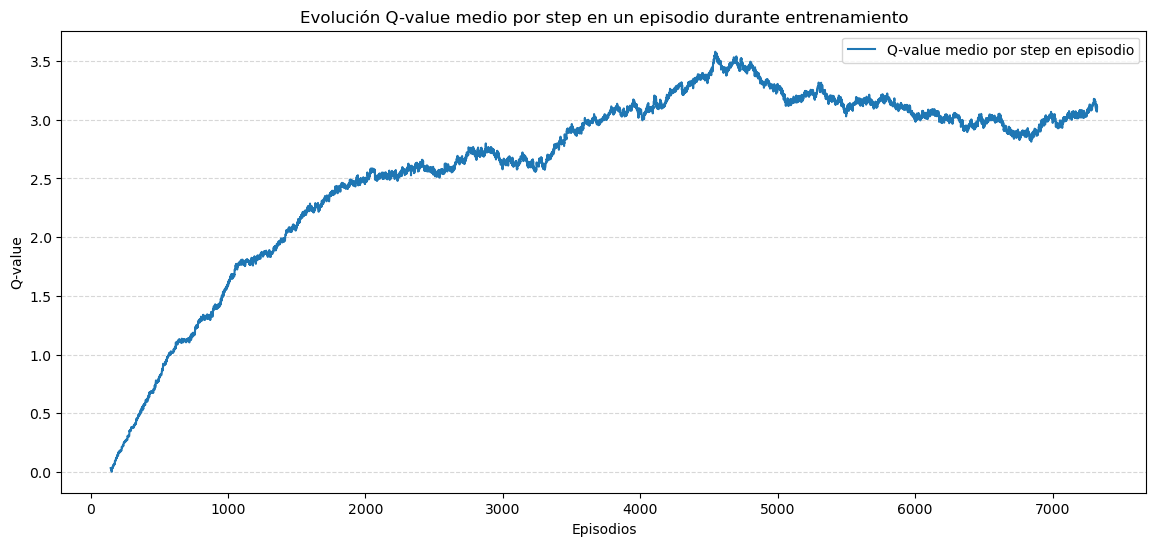

In [105]:
plt.figure(figsize=(14,6))
plt.plot( datos_entrenamiento["episode"], datos_entrenamiento["mean_q"], "-", label = "Q-value medio por step en episodio")

plt.title("Evolución Q-value medio por step en un episodio durante entrenamiento")
plt.xlabel('Episodios')
plt.ylabel('Q-value')
plt.legend()
plt.grid(axis="y", linestyle = '--', alpha = 0.5)
plt.show()
